# Import required libraries


In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
from matplotlib import pyplot as plt

import geopandas as gpd
from shapely import wkt

In [3]:
import cartoframes
from cartoframes.auth import set_default_credentials
from cartoframes.viz import Map, Layer, popup_element, size_bins_style

In [4]:
# from cartoframes.viz.helpers import color_bins_layer

from cartoframes.viz import Map, Layer, basemaps, popup_element, basic_style, color_category_style, color_bins_style, default_legend, color_bins_legend, category_widget, formula_widget,  histogram_widget

In [5]:
set_default_credentials('https://cartoframes.carto.com')

# Import the portland data

In [6]:
df = pd.read_csv("Final_merged_city_portland_with_NAICS.csv")

In [7]:
df.tail(20)

,Unnamed: 0,Unnamed: 0.1,geo_id,centroid,year,geometry,total_tran,pop,edut,collegemale,collegefemale,households,income,zipcode,Empratio,estabratio,ratio_65,ratio_22_50,bus_ratio,bus_ratio_total,public_ratio,car_ratio,bicy_ratio,walked_ratio,maxNaics_est,totalEstab,maxNaics_emp
4980,4980,1901,41051008600,POINT (-122.5841997909028 45.46868321437336),2016,MULTIPOLYGON (((-122.589348427813 45.468646920...,2130.0,4150.0,2793.0,90.0,263.0,132.0,1567.0,97266,361.088632,21.815029,0.433735,0.081446,1.000000,0.091549,0.091549,0.835211,0.012207,0.014085,72,128,72
4981,4981,1948,41051008901,POINT (-122.5169172531085 45.47031142766809),2016,MULTIPOLYGON (((-122.5493773955564 45.47604007...,4463.0,9385.0,6775.0,608.0,649.0,167.0,3123.0,97266,48.795761,2.947977,0.404901,0.143740,0.587500,0.031593,0.053775,0.880350,0.003137,0.010083,72,128,72
4982,4982,1958,41051008902,POINT (-122.5605713255571 45.46745111423488),2016,MULTIPOLYGON (((-122.5790413899689 45.46437394...,2020.0,3797.0,2582.0,271.0,246.0,125.0,1388.0,97266,995.433526,60.138728,0.451672,0.099026,0.803681,0.064851,0.080693,0.771782,0.023267,0.053960,72,128,72
4983,4983,1973,41051009000,POINT (-122.5306977041103 45.49261599741428),2016,MULTIPOLYGON (((-122.5377964271651 45.48742414...,4617.0,10809.0,6682.0,422.0,356.0,156.0,3173.0,97266,9.759152,0.589595,0.418818,0.097419,0.956153,0.146415,0.153130,0.750054,0.003465,0.019493,72,128,72
4984,4984,103,41051000502,POINT (-122.5849422459003 45.48369532857067),2017,MULTIPOLYGON (((-122.5963935475611 45.49031295...,2881.0,4994.0,3833.0,378.0,309.0,168.0,1930.0,97266,359.845857,26.235067,0.473769,0.128354,0.986711,0.103089,0.104478,0.792086,0.023603,0.027074,72,122,72
4985,4985,111,41051000601,POINT (-122.5666456072424 45.48478013912332),2017,MULTIPOLYGON (((-122.5787875151165 45.49027201...,2655.0,5154.0,3495.0,256.0,375.0,170.0,1905.0,97266,993.487476,72.431599,0.482538,0.081684,0.623153,0.095292,0.152919,0.750659,0.034275,0.026742,72,122,72
4986,4986,119,41051000602,POINT (-122.5719312738038 45.47473605104737),2017,MULTIPOLYGON (((-122.5790644457624 45.47586897...,3087.0,6163.0,4208.0,287.0,389.0,146.0,2038.0,97266,1009.132948,73.572254,0.482557,0.050300,0.855738,0.084548,0.098801,0.793327,0.022676,0.009718,72,122,72
4987,4987,135,41051000701,POINT (-122.5891068943317 45.5013842963898),2017,MULTIPOLYGON (((-122.5994416317342 45.50538697...,2685.0,4824.0,3604.0,490.0,465.0,191.0,2008.0,97266,125.163776,9.125241,0.529851,0.109660,0.827485,0.105400,0.127374,0.694227,0.081564,0.006704,72,122,72
4988,4988,151,41051000702,POINT (-122.590118674705 45.49390878197436),2017,MULTIPOLYGON (((-122.6018395934989 45.49746295...,3012.0,5163.0,3940.0,731.0,469.0,150.0,1994.0,97266,132.986513,9.695568,0.528375,0.104590,0.928382,0.116202,0.125166,0.691235,0.100930,0.027556,72,122,72
4989,4989,375,41051001602,POINT (-122.5721708020329 45.51190570076012),2017,MULTIPOLYGON (((-122.5790446695041 45.51912505...,2173.0,4682.0,3691.0,383.0,482.0,140.0,1714.0,97266,383.314066,27.946050,0.490816,0.105297,0.630814,0.099862,0.158306,0.681086,0.075012,0.017948,72,122,72


# Data preprocessing

In [8]:
df = df.drop(columns = ["Unnamed: 0"])

In [9]:
df = df.drop_duplicates()

In [10]:
df.head(20)

,Unnamed: 0.1,geo_id,centroid,year,geometry,total_tran,pop,edut,collegemale,collegefemale,households,income,zipcode,Empratio,estabratio,ratio_65,ratio_22_50,bus_ratio,bus_ratio_total,public_ratio,car_ratio,bicy_ratio,walked_ratio,maxNaics_est,totalEstab,maxNaics_emp
0,2432,41051010402,POINT (-122.3356996936241 45.48566422279789),2010,MULTIPOLYGON (((-122.3868792758254 45.51902980...,2601.0,5717.0,3699.0,294.0,356.0,162.0,1859.0,97009,0.000000,0.000000,0.391464,0.091307,0.490196,0.009612,0.019608,0.891580,0.005767,0.014994,23,95,23
1,2435,41051010402,POINT (-122.3356996936241 45.48566422279789),2011,MULTIPOLYGON (((-122.3868792758254 45.51902980...,2826.0,6037.0,4024.0,368.0,476.0,149.0,1960.0,97009,0.000000,0.000000,0.405831,0.108001,0.305970,0.014508,0.047417,0.866596,0.030432,0.009908,23,92,23
2,2438,41051010402,POINT (-122.3356996936241 45.48566422279789),2012,MULTIPOLYGON (((-122.3868792758254 45.51902980...,2868.0,6153.0,4090.0,369.0,507.0,139.0,1998.0,97009,0.000000,0.000000,0.393954,0.109052,0.266667,0.011158,0.041841,0.857043,0.033473,0.004533,23,85,23
3,2441,41051010402,POINT (-122.3356996936241 45.48566422279789),2013,MULTIPOLYGON (((-122.3868792758254 45.51902980...,2876.0,6022.0,3931.0,296.0,404.0,129.0,2087.0,97009,0.000000,0.000000,0.366490,0.108602,0.321739,0.012865,0.039986,0.858832,0.025730,0.012517,23,86,23
4,2444,41051010402,POINT (-122.335683996136 45.48565935229686),2014,MULTIPOLYGON (((-122.3868792758254 45.51902980...,3078.0,6181.0,4094.0,316.0,457.0,120.0,2191.0,97009,0.000000,0.000000,0.387316,0.108720,0.264368,0.007472,0.028265,0.875569,0.016244,0.023392,23,89,23
5,2447,41051010402,POINT (-122.3356858461854 45.48565778402043),2015,MULTIPOLYGON (((-122.3868792758254 45.51902980...,3063.0,6349.0,4184.0,346.0,517.0,116.0,2201.0,97009,0.000000,0.000000,0.382107,0.118916,0.596026,0.029383,0.049298,0.841659,0.016650,0.026118,23,87,23
6,2450,41051010402,POINT (-122.3356596646475 45.48564052912985),2016,MULTIPOLYGON (((-122.3868792758254 45.51902980...,3190.0,6566.0,4383.0,334.0,540.0,117.0,2201.0,97009,0.000000,0.000000,0.362473,0.128389,0.813187,0.023197,0.028527,0.878056,0.000000,0.033856,23,87,23
7,2453,41051010402,POINT (-122.3356596646475 45.48564052912985),2017,MULTIPOLYGON (((-122.3868792758254 45.51902980...,3456.0,6981.0,4633.0,399.0,485.0,115.0,2303.0,97009,0.000000,0.000000,0.355966,0.133792,0.867188,0.032118,0.037037,0.882523,0.000000,0.035880,23,97,23
8,2536,41051010500,POINT (-122.08527042624 45.52768157713402),2010,MULTIPOLYGON (((-122.3970989671113 45.57260058...,1765.0,3944.0,2580.0,258.0,313.0,106.0,1320.0,97014,255.555556,17.888889,0.259381,0.107759,1.000000,0.012465,0.012465,0.803966,0.002266,0.031161,44,6,72
200,2539,41051010500,POINT (-122.08527042624 45.52768157713402),2011,MULTIPOLYGON (((-122.3970989671113 45.57260058...,1796.0,4138.0,2803.0,247.0,284.0,107.0,1428.0,97014,249.166667,17.250000,0.301112,0.106573,1.000000,0.004454,0.004454,0.827951,0.005011,0.027283,44,6,72


In [11]:
df.shape

(2714, 26)

In [12]:
df['geometry'] = df['geometry'].apply(wkt.loads)
df['centroid'] = df['centroid'].apply(wkt.loads)
df = gpd.GeoDataFrame(df, geometry='geometry')

11 Agriculture, Forestry, Fishing and Hunting 21 Mining, Quarrying, and Oil and Gas Extraction 22 Utilities 23 Construction 31-33 Manufacturing 42 Wholesale Trade 44-45 Retail Trade 48-49 Transportation and Warehousing 51 Information 52 Finance and Insurance 53 Real Estate and Rental and Leasing 54 Professional, Scientific, and Technical Services 55 Management of Companies and Enterprises 56 Administrative and Support and Waste Management and Remediation Services 61 Educational Services 62 Health Care and Social Assistance 71 Arts, Entertainment, and Recreation 72 Accommodation and Food Services 81 Other Services (except Public Administration) 92

In [13]:
replace_values = {11:'Agriculture, Forestry, Fishing and Hunting',
                  12:'Mining, Quarrying, and Oil and Gas Extraction',
                  22:'Utilities',
                  23:'Construction',
                  31:'Manufacturing',
                  32:'Manufacturing',
                  33:'Manufacturing',
                  42:'Wholesale Trade',
                  44:'Retail Trade',
                  45:'Retail Trade',
                  48:'Transportation and Warehousing',
                  49:'Transportation and Warehousing',
                  51:'Information',
                  52:'Finance and Insurance',
                  53:'Real Estate and Rental and Leasing',
                  54:'Professional, Scientific, and Technical Services',
                  55:'Management of Companies and Enterprises',
                  56:'Administrative and Support and Waste Management and Remediation Services',
                  61:'Educational Services',
                  62:'Health Care and Social Assistance',
                  71:'Arts, Entertainment, and Recreation',
                  72:'Accommodation and Food Services',
                  81:'Other Services (except Public Administration)'}

In [14]:
df['maxNaics_est_cat'] = df['maxNaics_est']

In [15]:
df = df.replace({"maxNaics_est_cat": replace_values})

In [16]:
df['maxNaics_est_cat'] = pd.Categorical(df.maxNaics_est_cat)

In [17]:
Map(Layer(df,color_category_style('maxNaics_est_cat'),popup_hover=[popup_element('pop','Population')],title='Industry'),basemap=basemaps.voyager)

# Create new DF for clustering

In [18]:
df2 = df[['geo_id','year','total_tran','pop','edut', 'collegemale', 'collegefemale', 'households', 'income',
       'zipcode', 'Empratio', 'estabratio', 'ratio_65', 'ratio_22_50',
       'bus_ratio', 'bus_ratio_total', 'public_ratio', 'car_ratio',
       'bicy_ratio', 'walked_ratio', 'maxNaics_est', 'totalEstab',
       'maxNaics_emp']]

# KMeans

In [19]:
from sklearn.cluster import KMeans

[66930908092.714264, 42889439010.6713, 30213677807.345, 23759726184.220093, 20183768991.67461, 16658784451.563667, 14291720452.885077, 12645103689.119518]


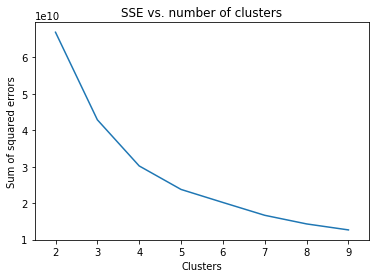

In [20]:
SSE = []
for i in range(2,10):
    km = KMeans(n_clusters = i)
    res=km.fit(df2)
    SSE.append(res.inertia_)
print (SSE)

plt.gca()
plt.plot(range(2,10),SSE)
plt.xlabel("Clusters")
plt.ylabel("Sum of squared errors")
plt.title("SSE vs. number of clusters")
plt.xlim(1.5,9.5)
plt.show()

In [21]:
km5 = KMeans(n_clusters=5)

In [22]:
km5cls = km5.fit(df2)

In [23]:
labels = km5cls.labels_

#Then get the frequency count of the non-negative labels
counts = np.bincount(labels[labels>=0])

print (counts)


[ 818   16 1256  545   79]


In [24]:
df['cluster_labels'] = pd.Series(km5cls.labels_, index=df.index)

In [25]:
df

,Unnamed: 0.1,geo_id,centroid,year,geometry,total_tran,pop,edut,collegemale,collegefemale,households,income,zipcode,Empratio,estabratio,ratio_65,ratio_22_50,bus_ratio,bus_ratio_total,public_ratio,car_ratio,bicy_ratio,walked_ratio,maxNaics_est,totalEstab,maxNaics_emp,maxNaics_est_cat,cluster_labels
0,2432,41051010402,POINT (-122.3356996936241 45.48566422279789),2010,"MULTIPOLYGON (((-122.38688 45.51903, -122.3726...",2601.0,5717.0,3699.0,294.0,356.0,162.0,1859.0,97009,0.000000,0.000000,0.391464,0.091307,0.490196,0.009612,0.019608,0.891580,0.005767,0.014994,23,95,23,Construction,3
1,2435,41051010402,POINT (-122.3356996936241 45.48566422279789),2011,"MULTIPOLYGON (((-122.38688 45.51903, -122.3726...",2826.0,6037.0,4024.0,368.0,476.0,149.0,1960.0,97009,0.000000,0.000000,0.405831,0.108001,0.305970,0.014508,0.047417,0.866596,0.030432,0.009908,23,92,23,Construction,3
2,2438,41051010402,POINT (-122.3356996936241 45.48566422279789),2012,"MULTIPOLYGON (((-122.38688 45.51903, -122.3726...",2868.0,6153.0,4090.0,369.0,507.0,139.0,1998.0,97009,0.000000,0.000000,0.393954,0.109052,0.266667,0.011158,0.041841,0.857043,0.033473,0.004533,23,85,23,Construction,3
3,2441,41051010402,POINT (-122.3356996936241 45.48566422279789),2013,"MULTIPOLYGON (((-122.38688 45.51903, -122.3726...",2876.0,6022.0,3931.0,296.0,404.0,129.0,2087.0,97009,0.000000,0.000000,0.366490,0.108602,0.321739,0.012865,0.039986,0.858832,0.025730,0.012517,23,86,23,Construction,3
4,2444,41051010402,POINT (-122.335683996136 45.48565935229686),2014,"MULTIPOLYGON (((-122.38688 45.51903, -122.3726...",3078.0,6181.0,4094.0,316.0,457.0,120.0,2191.0,97009,0.000000,0.000000,0.387316,0.108720,0.264368,0.007472,0.028265,0.875569,0.016244,0.023392,23,89,23,Construction,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1887,41051008500,POINT (-122.547126858435 45.48282091614918),2017,"MULTIPOLYGON (((-122.55740 45.47834, -122.5570...",2214.0,4518.0,3076.0,96.0,223.0,124.0,1477.0,97266,758.805395,55.321773,0.414564,0.137450,0.954733,0.104788,0.109756,0.837398,0.000000,0.015357,72,122,72,Accommodation and Food Services,0
4996,1903,41051008600,POINT (-122.5841997909028 45.46868321437336),2017,"MULTIPOLYGON (((-122.58935 45.46865, -122.5893...",2217.0,4008.0,2901.0,152.0,278.0,125.0,1612.0,97266,289.441233,21.102119,0.449850,0.093313,1.000000,0.114118,0.114118,0.746504,0.009923,0.009021,72,122,72,Accommodation and Food Services,0
4997,1951,41051008901,POINT (-122.5169172531085 45.47031142766809),2017,"MULTIPOLYGON (((-122.54938 45.47604, -122.5454...",4074.0,9634.0,6682.0,610.0,560.0,161.0,3108.0,97266,39.113680,2.851638,0.365165,0.148952,0.567227,0.033137,0.058419,0.873098,0.003927,0.021846,72,122,72,Accommodation and Food Services,3
4998,1959,41051008902,POINT (-122.5605713255571 45.46745111423488),2017,"MULTIPOLYGON (((-122.57904 45.46437, -122.5686...",2146.0,3974.0,2720.0,352.0,297.0,119.0,1450.0,97266,797.919075,58.173410,0.483392,0.104177,0.745665,0.060112,0.080615,0.769804,0.032619,0.046598,72,122,72,Accommodation and Food Services,0


In [26]:
replace_values = {
    1:'Cluster 1',
    2:'Cluster 2',
    3:'Cluster 3',
    4:'Cluster 4',
    0:'Cluster 0'
}

In [27]:
df['cluster_labels_cat'] = df['cluster_labels']

In [28]:
df = df.replace({"cluster_labels_cat": replace_values})

In [29]:
df['cluster_labels_cat'] = pd.Categorical(df.cluster_labels_cat)

In [30]:
Map(Layer(df,color_category_style('cluster_labels_cat'),popup_hover=[popup_element('maxNaics_est_cat','Industry')]),basemap=basemaps.voyager)

# Gaussian Mixture


In [31]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=5)
res = gmm.fit(df2)

labels = gmm.predict(df2)

In [32]:
labels

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [33]:
df['gaussian_labels'] = pd.Series(labels, index=df.index)

In [34]:
replace_values = {
    1:'Cluster 1',
    2:'Cluster 2',
    3:'Cluster 3',
    4:'Cluster 4',
    0:'Cluster 0'
}

In [35]:
df['gaussian_labels_cat'] = df['gaussian_labels']

In [36]:
df = df.replace({"gaussian_labels_cat": replace_values})

In [37]:
df['gaussian_labels_cat'] = pd.Categorical(df.gaussian_labels_cat)

In [66]:
Map(Layer(df,color_category_style('gaussian_labels_cat'),popup_hover=[popup_element('maxNaics_est_cat','Industry')]),basemap=basemaps.voyager)

# DBSCAN

In [39]:
from sklearn.cluster import DBSCAN

In [40]:
clustering = DBSCAN(eps=0.5, min_samples=5).fit(df2)

In [41]:
clustering.labels_

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [42]:
df['dbscan_labels'] = pd.Series(clustering.labels_, index=df.index)

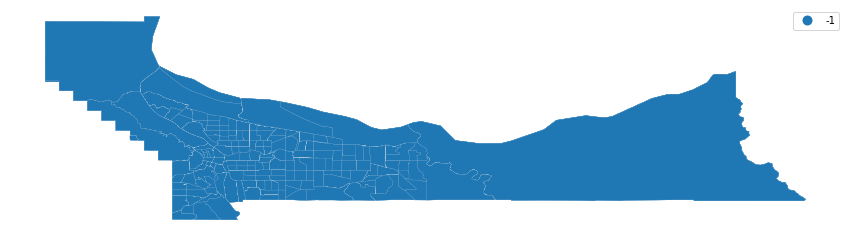

In [43]:
f, ax = plt.subplots(1, figsize=(15, 15))

df.plot(column='dbscan_labels', categorical=True, legend=True,linewidth=0.1, edgecolor='white', ax=ax)

ax.set_axis_off()

plt.show()

DBSCAN has failed to identify any clusters in the data

# Birch

In [44]:
from sklearn.cluster import Birch

In [45]:
brc = Birch(n_clusters=5)

In [46]:
brc.fit(df2)

Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=5,
      threshold=0.5)

In [47]:
brc.predict(df2)

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [48]:
labels = brc.predict(df2)

#Then get the frequency count of the non-negative labels
counts = np.bincount(labels[labels>=0])

print (counts)

[  90  905 1008   16  695]


In [49]:
np.unique(labels)

array([0, 1, 2, 3, 4], dtype=int64)

In [50]:
df['birch_labels'] = pd.Series(labels, index=df.index)

In [51]:
replace_values = {
    1:'Cluster 1',
    2:'Cluster 2',
    3:'Cluster 3',
    4:'Cluster 4',
    0:'Cluster 0'
}

In [52]:
df['birch_labels_cat'] = df['birch_labels']

In [53]:
df = df.replace({"birch_labels_cat": replace_values})

In [54]:
df['birch_labels_cat'] = pd.Categorical(df.birch_labels_cat)

In [55]:
Map(Layer(df,color_category_style('birch_labels_cat'),popup_hover=[popup_element('maxNaics_est_cat','Industry')]),basemap=basemaps.voyager)

# Mean Shift Clustering

In [56]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [57]:
bandwidth = estimate_bandwidth(df2, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(df2)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 3


In [58]:
#Then get the frequency count of the non-negative labels
counts = np.bincount(labels[labels>=0])

print (counts)

[2682   16   16]


In [59]:
df['meanShift_labels'] = pd.Series(labels, index=df.index)

In [60]:
replace_values = {
    1:'Cluster 1',
    2:'Cluster 2',
    0:'Cluster 0'
}

In [61]:
df['meanShift_labels_cat'] = df['meanShift_labels']

In [62]:
df = df.replace({"meanShift_labels_cat": replace_values})

In [63]:
df['meanShift_labels_cat'] = pd.Categorical(df.meanShift_labels_cat)

In [64]:
Map(Layer(df,color_category_style('meanShift_labels_cat'),popup_hover=[popup_element('maxNaics_est_cat','Industry')]),basemap=basemaps.voyager)

Mean Shift has failed to identify significant clusters

In [65]:
#TODO implement classification on data
#TODO figure out pipeline for front end